## Patient Diagnosis and Drug Recommendation System

In this project, we will classify the condition of patients using the reviews of the drugs given by patients using drug reviews dataset available in [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).

## Importing libraries

In [1]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
!pip install BeautifulSoup4 
!pip install nltk

In [4]:
str1="I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."


lst = [str1]
lst

['I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.']

In [5]:
import nltk
import sklearn
import bs4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(bs4.__version__))

The nltk version is 3.8.1.
The scikit-learn version is 1.3.0.
The scikit-learn version is 4.12.2.


In [7]:
df=pd.read_csv('drugsComTrain_raw.csv')

In [8]:
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [9]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [10]:
df_train = df[(df['condition']=='Birth Control') |(df['condition']=='Acne')| (df['condition']=='ADHD')|(df['condition']=='Depression') |(df['condition']=='Migraine')| (df['condition']=='Pneumonia') |(df['condition']=='High Blood Pressure') |(df['condition']=='Urinary Tract Infection') |(df['condition']=='Asthma, acute')|(df['condition']=='Diabetes, Type 2')]

In [11]:
df.shape

(161297, 7)

In [12]:
df_train.shape

(55124, 7)

In [ ]:
print(df_train.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [15]:
X = df_train.drop(['drugName', 'rating', 'date', 'usefulCount'], axis=1)

## EDA

In [16]:
X.condition.value_counts()

condition
Birth Control              28788
Depression                  9069
Acne                        5588
ADHD                        3383
Diabetes, Type 2            2554
High Blood Pressure         2321
Migraine                    1694
Urinary Tract Infection     1316
Pneumonia                    276
Asthma, acute                135
Name: count, dtype: int64

In [17]:
X.head()

uniqueID      condition                                             review
1      95260           ADHD  "My son is halfway through his fourth week of ...
2      92703  Birth Control  "I used to take another oral contraceptive, wh...
3     138000  Birth Control  "This is my first time using any form of birth...
9      48928  Birth Control  "I had been on the pill for many years. When m...
11     75612     Depression  "I have taken anti-depressants for years, with...

In [18]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]
X_migr=X[(X['condition']=='Migraine')]
X_pnem=X[(X['condition']=='Pneumonia')]
X_asth=X[(X['condition']=='Asthma, acute')]
X_urin=X[(X['condition']=='Urinary Tract Infection')]
X_adhd=X[(X['condition']=='ADHD')]
X_acne=X[(X['condition']=='Acne')]


In [19]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ------------- -------------------------- 102.4/299.9 kB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/299.9 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 184.3/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/299.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/299.9 kB 1.4 MB/s eta 0:00:01
   --

Text(0.5, 1.0, 'Word cloud for Birth control')

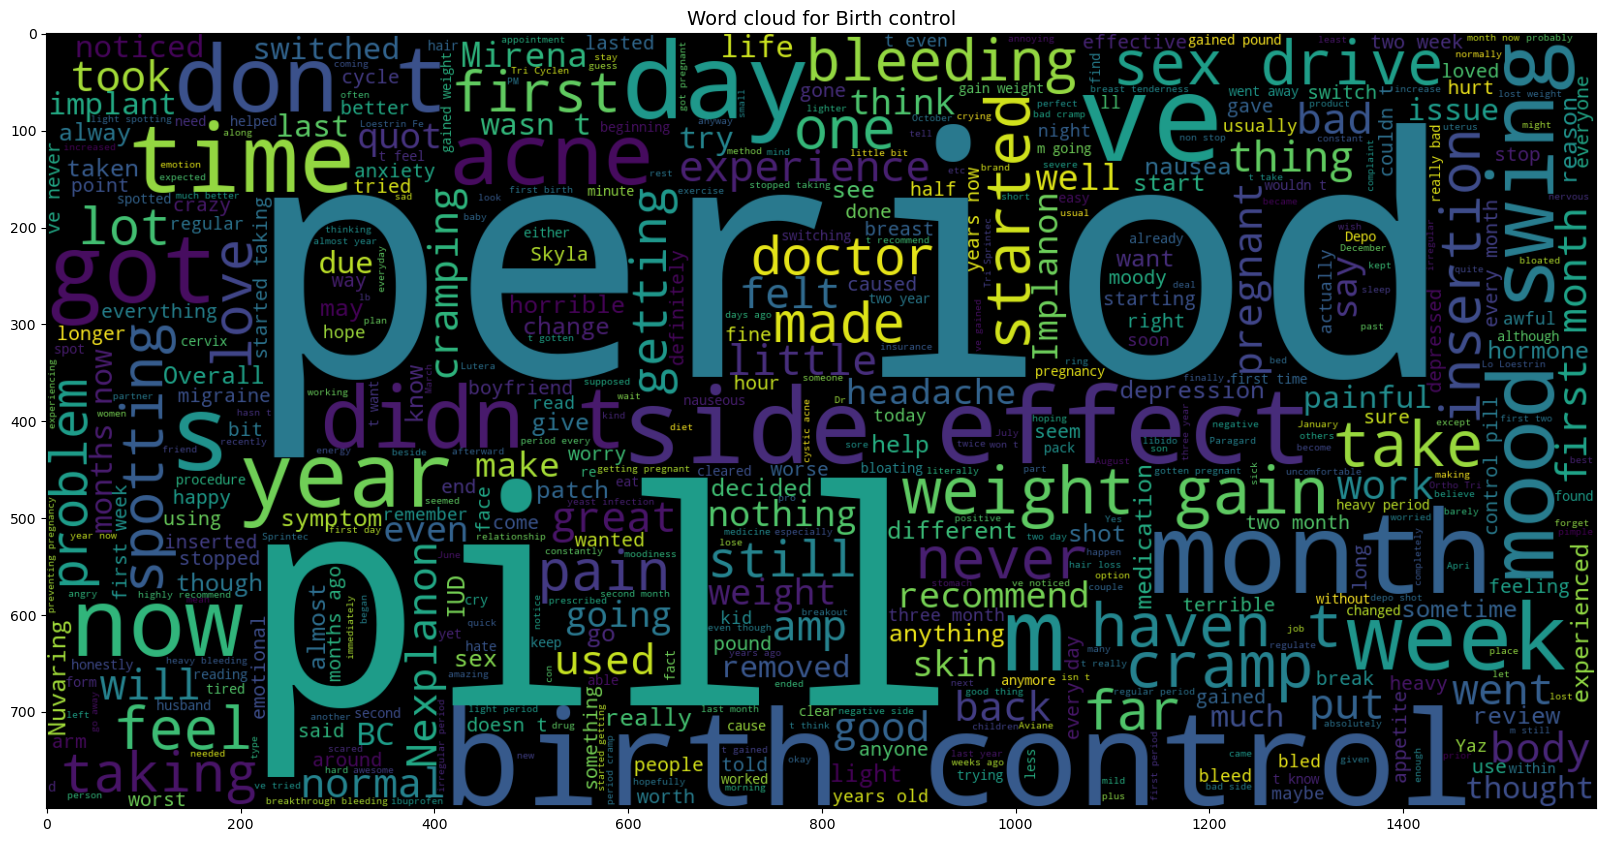

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

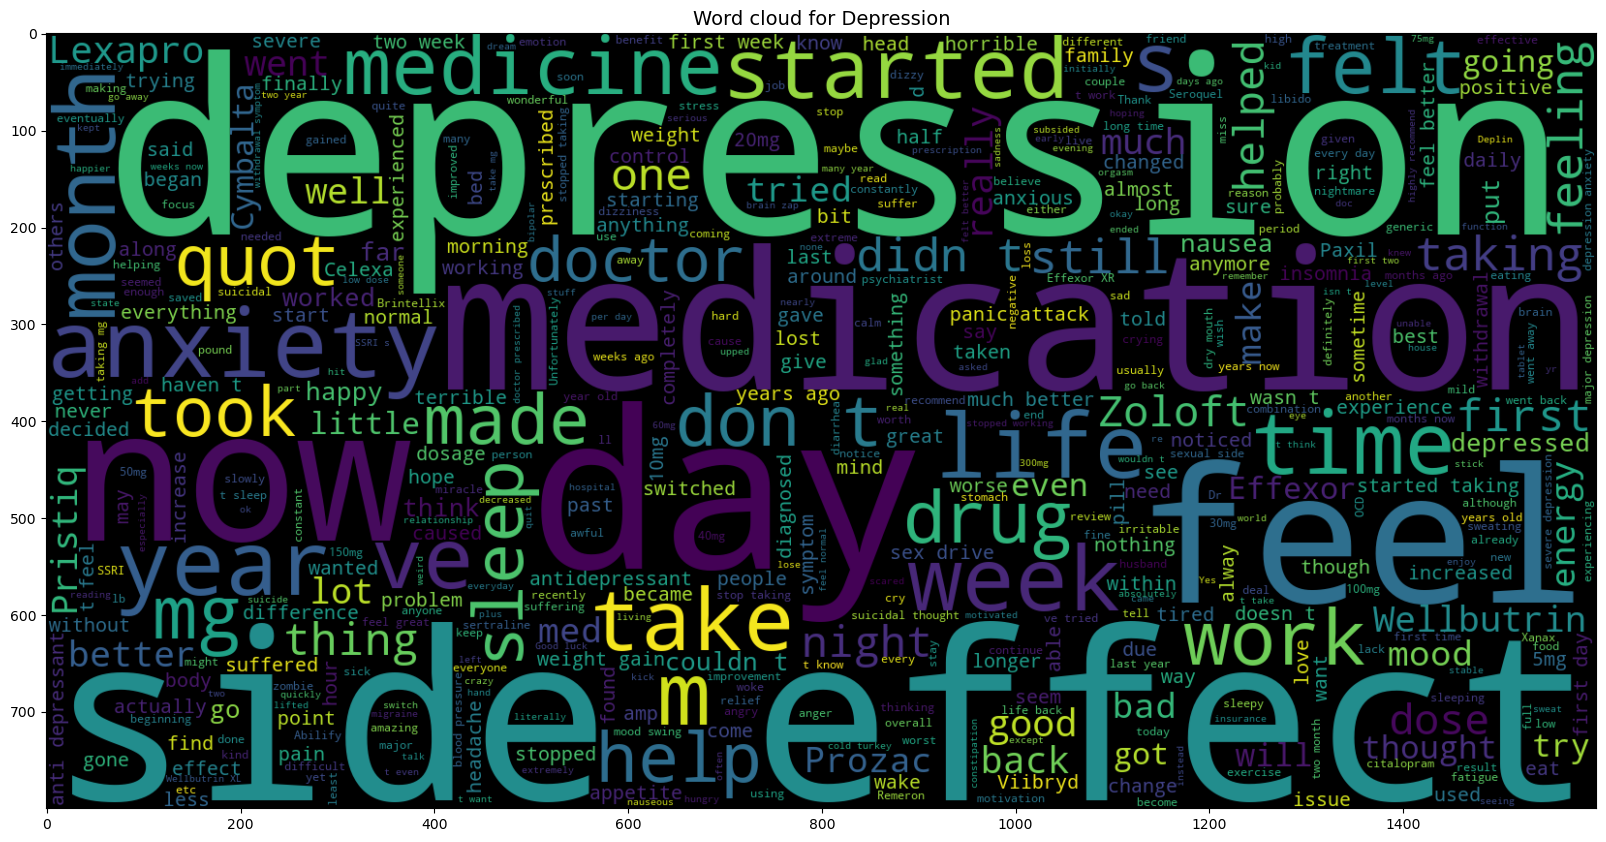

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

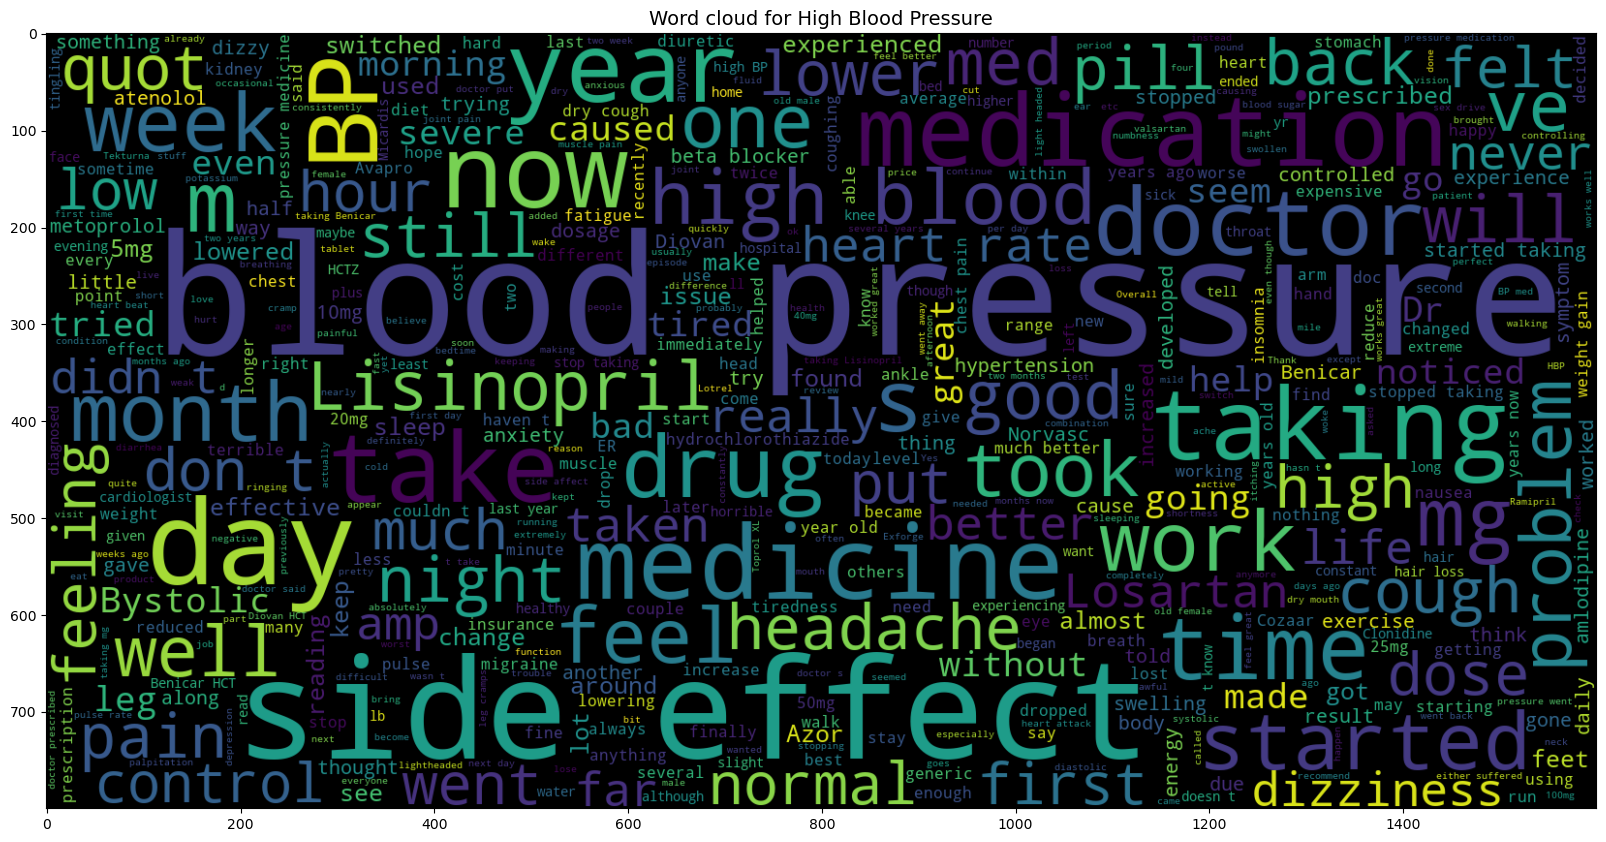

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

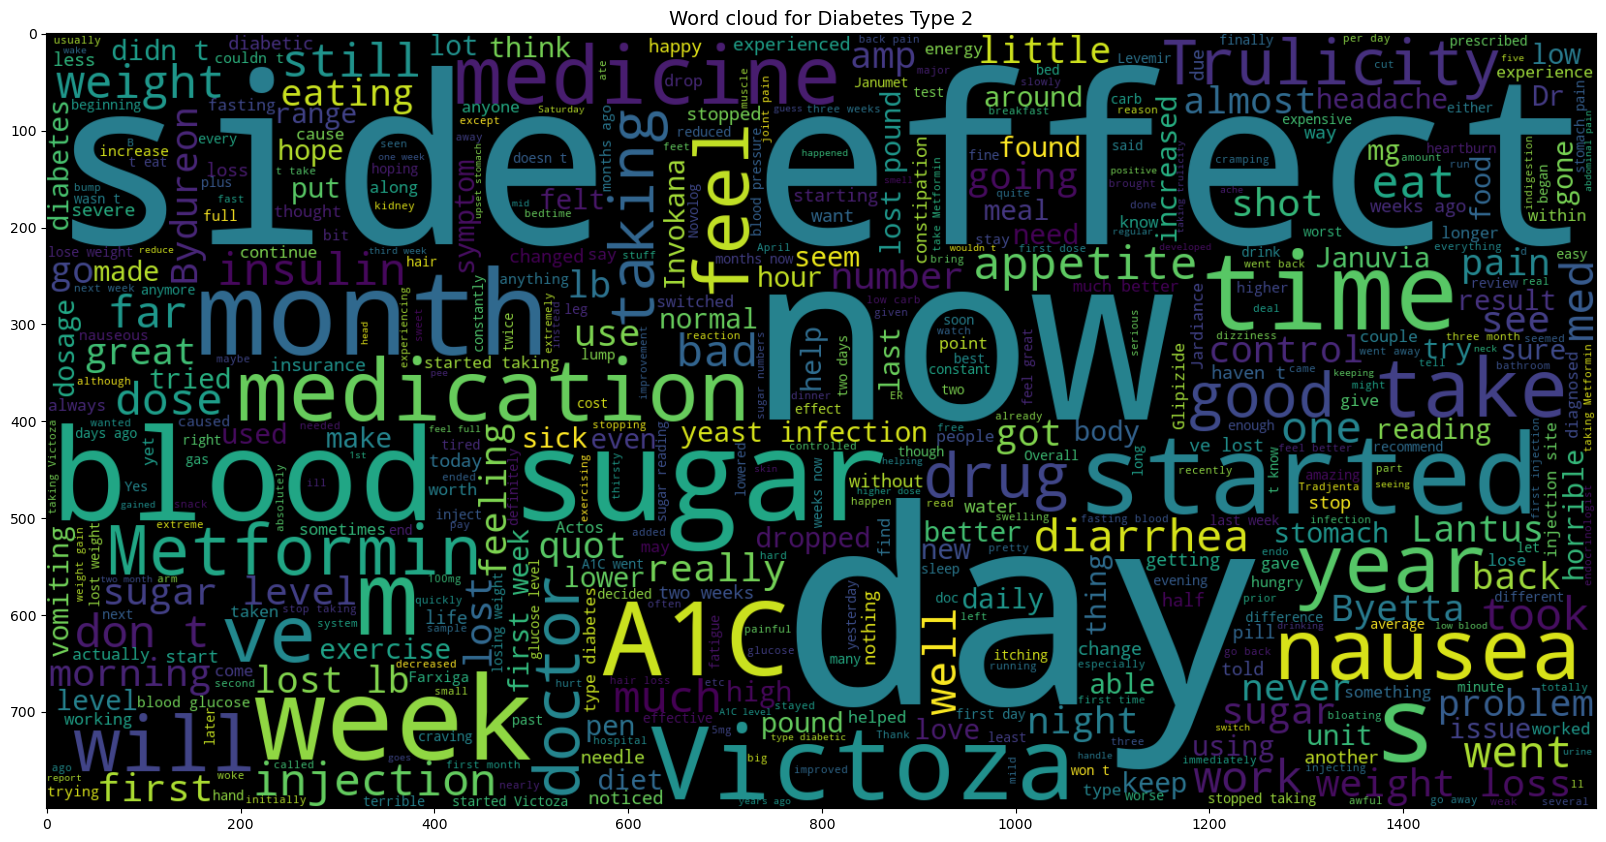

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

## data preprocessing

In [24]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [26]:
# Convert all columns to string, then remove double quotes
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].astype(str).str.replace('"', '')

In [28]:
pd.set_option('display.max_colwidth', 1000)


In [29]:
X.head()

uniqueID      condition  \
1     95260           ADHD   
2     92703  Birth Control   
3    138000  Birth Control   
9     48928  Birth Control   
11    75612     Depression   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  
1                 My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                        This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
9                       I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.  
11          

### What are stopwords ?

Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

The most common words used in a text are **“the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”** etc.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [33]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## Lemmitization
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [35]:
from bs4 import BeautifulSoup
import re

In [36]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jayap\AppData\Roaming\nltk_data...


True

In [39]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\jayap\AppData\Local\Temp\ipykernel_31212\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [40]:
X.head()

uniqueID      condition  \
1     95260           ADHD   
2     92703  Birth Control   
3    138000  Birth Control   
9     48928  Birth Control   
11    75612     Depression   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  \
1                 My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.   
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                        This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                       I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11     

## Creating features and Target Variable

In [41]:
X_feat=X['review_clean']
y=X['condition']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [47]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [48]:
count_train

<44099x19415 sparse matrix of type '<class 'numpy.int64'>'
	with 1400551 stored elements in Compressed Sparse Row format>

## Machine Learning Model : Naive Bayes

accuracy:   0.935
Confusion matrix, without normalization


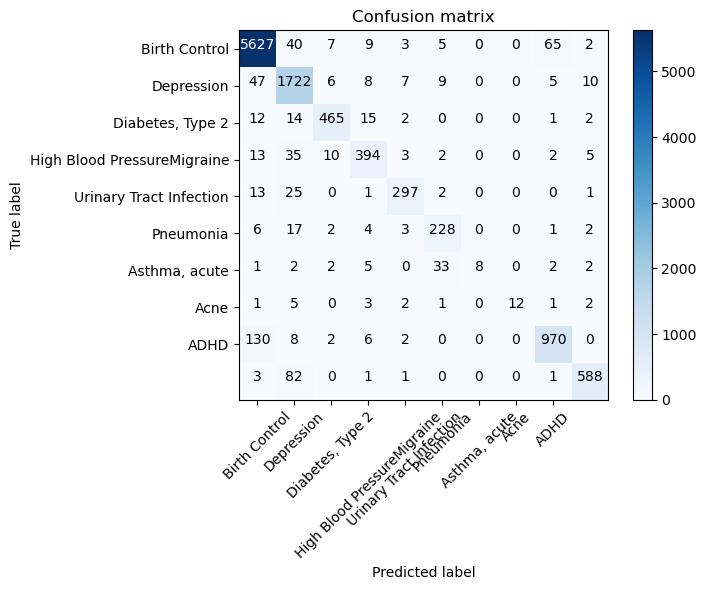

In [49]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure''Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])

## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.952
Confusion matrix, without normalization


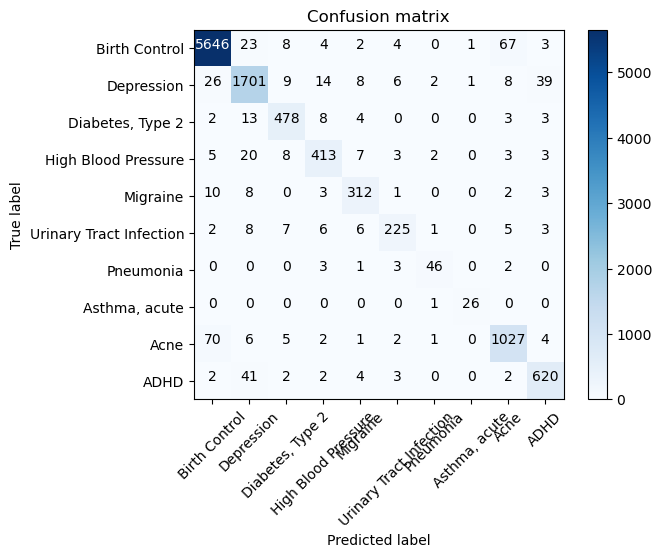

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])

### TFIDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.825
Confusion matrix, without normalization


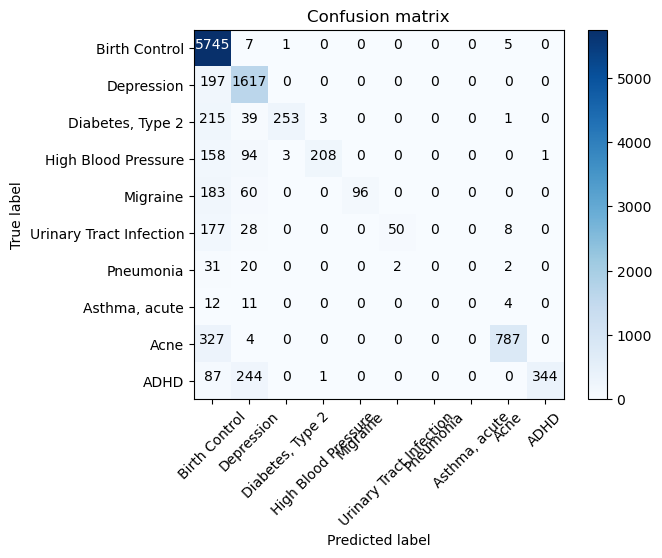

In [52]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])

## Machine Learning Model TFIDF

accuracy:   0.959
Confusion matrix, without normalization


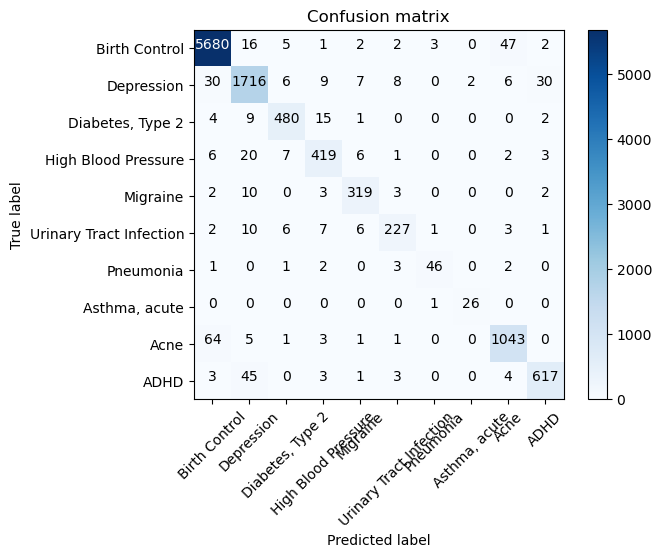

In [53]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])


## TFIDF: Bigrams

In [54]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.970
Confusion matrix, without normalization


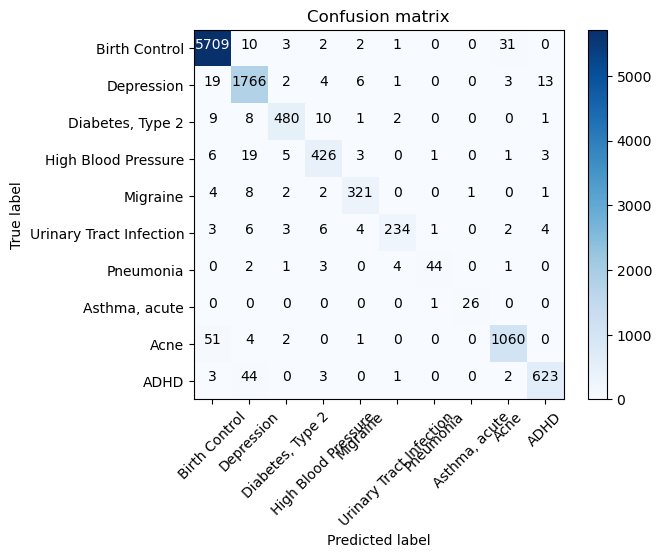

In [55]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])

## TFIDF : Trigrams

accuracy:   0.970
Confusion matrix, without normalization


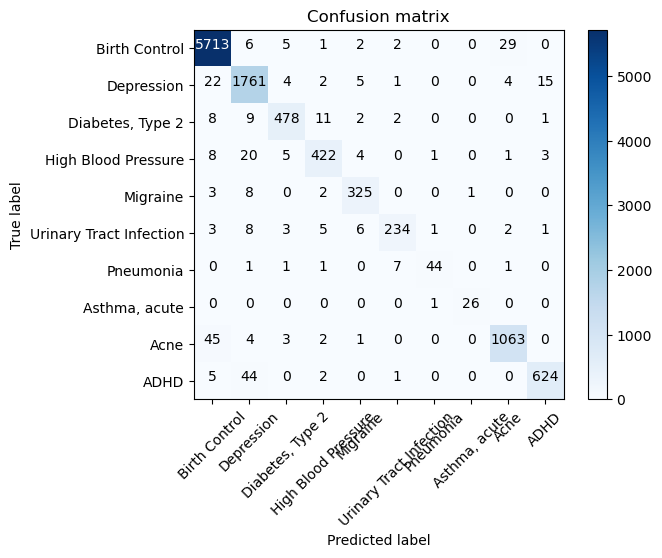

In [56]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Migraine','Urinary Tract Infection','Pneumonia','Asthma, acute','Acne','ADHD'])

## Most important Features

In [57]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)


In [58]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Birth Control')

Birth Control concerta magically 3.3228997427848532
Birth Control oily say 3.4629535240069567
Birth Control fatigue non 3.648076476470843
Birth Control small pop 3.682092696508042
Birth Control downside expensive 4.743991087345438
Birth Control day switcharoo 4.860693860047598
Birth Control love heavy 5.135470022557914
Birth Control downhill year 5.272028083946418
Birth Control lolo pill 5.412235766648417
Birth Control easily marked 6.37627496110474


In [59]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression tried lose 2.9918736632643275
Depression recmmended 3.3133060888300156
Depression hell worked 3.8156322574931427
Depression felt intercourse 4.7455974053889936
Depression able exist 4.7902105107091115
Depression gone good 6.448054439131865
Depression breaking frequently 6.576409677755332
Depression skinny girl 6.968009394527225
Depression menstruation make 7.121245789057335
Depression outgoing energy 10.362935956801412


In [60]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure coreg diovan 2.692436716810377
High Blood Pressure suggest spiro 2.822432182596402
High Blood Pressure point hard 3.4390852302803068
High Blood Pressure combination beta 3.636915819555207
High Blood Pressure block apply 4.024665026679621
High Blood Pressure food right 4.250488782951725
High Blood Pressure ended trying 4.281785803571675
High Blood Pressure diarrhea intense 4.449907793431089
High Blood Pressure like percocet 5.13566312174496
High Blood Pressure experienced substantial 9.185122768187437


In [61]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 sister death 2.2220228685506327
Diabetes, Type 2 bad procedure 2.4770607763971566
Diabetes, Type 2 relpax market 2.5855295163006016
Diabetes, Type 2 ton horrible 2.7238812496795615
Diabetes, Type 2 took reason 2.9131348847302414
Diabetes, Type 2 anxiety tell 3.169139052843787
Diabetes, Type 2 perfect fit 4.037446267749466
Diabetes, Type 2 energy excitement 4.149775948803804
Diabetes, Type 2 followed little 4.436230006352109
Diabetes, Type 2 food constant 4.533870708731123


In [62]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Migraine')

Migraine existent nice 1.3896097480785654
Migraine foot normal 1.531619262900627
Migraine hour wake 1.6259185768893385
Migraine weakness ate 1.657985511382139
Migraine diabetes heck 1.7638605944936825
Migraine started sleeping 1.7909325545817876
Migraine yr bsg 1.8303798314880662
Migraine year concerta 1.915610117054795
Migraine sitting blood 1.9280245797457103
Migraine study tonight 2.4212424855258465


In [63]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Urinary Tract Infection')

Urinary Tract Infection biggest concern 1.6738476881691027
Urinary Tract Infection hell basically 1.7084833004864841
Urinary Tract Infection dry red 1.7114246395029393
Urinary Tract Infection minocycline bactrim 1.759521648232194
Urinary Tract Infection version jolessa 2.083480395220918
Urinary Tract Infection permanently acne 2.0875529977614367
Urinary Tract Infection headache blinding 2.405711983634604
Urinary Tract Infection branch broaden 2.92248733170807
Urinary Tract Infection course likely 3.8259424951215335
Urinary Tract Infection heavy prolonged 6.334940770984059


In [64]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Pneumonia')

Pneumonia getting past 1.016313087402677
Pneumonia brand blisovi 1.0758549586715909
Pneumonia field yr 1.1081746099677559
Pneumonia minocycline bactrim 1.12600768538912
Pneumonia like stuffed 1.1452838259475477
Pneumonia brand better 1.1837854606938214
Pneumonia breaker sure 1.2163952870932546
Pneumonia biggy string 1.6477465488666516
Pneumonia concern 1.9383246504174068
Pneumonia branch broaden 2.018656580324299


In [65]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Asthma, acute')

Asthma, acute goal blood 0.6089373454914856
Asthma, acute bipolar making 0.619885603500952
Asthma, acute sun instead 0.6539922490384734
Asthma, acute come heard 0.6605545075509043
Asthma, acute cold year 0.7327001560134718
Asthma, acute better heard 0.7519883987981469
Asthma, acute feeling awesome 1.4522461523995545
Asthma, acute controlled bleeding 1.790932873986169
Asthma, acute better quit 2.4432334104426894
Asthma, acute cold upper 3.108574055562077


In [66]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Acne')

Acne annoying thought 2.6897744639766126
Acne hold hand 2.981065042779459
Acne realize breakout 3.1614070710288784
Acne family stop 3.698835851928131
Acne manage type 3.86022177875367
Acne test bipolar 4.593109999935697
Acne start kick 4.651035575691719
Acne paranoid socially 5.234344329190147
Acne adapelene inactive 6.963915321600236
Acne adrenaline rush 9.152685788670725


In [67]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'ADHD')

ADHD insomnia unbelievable 2.8795564039059216
ADHD glob went 2.9627656745664734
ADHD people swimsuit 3.0635924856847487
ADHD company work 3.1633030877142208
ADHD wet sweat 5.080266950038722
ADHD appointment neurologist 5.876405389738354
ADHD went cryselle 7.225023765741998
ADHD intense symptom 7.3240984158247375
ADHD arm barely 8.675986760934665
ADHD assume thins 12.399315760834542


## Sample Predictions

In [68]:
X.tail()

uniqueID            condition  \
161273   109111        Birth Control   
161278    86533     Diabetes, Type 2   
161286    93069           Depression   
161290   103458  High Blood Pressure   
161291   164345        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278                                                                                                                                                                                                                                                                                                                                                                                                   I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me   
161286                                                                                                                                                                                                                                                                                                                                                                                         This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.   
161290                                                                                                                                                                                  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   
161291                                                                                                                                                                                                                          This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(   

                                                         

In [69]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [70]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [71]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    "Being asthmatic, I often suffer bronchial infections. I had borderline pneumonia a few months ago - a one week course of Biaxin XL cleared it up. I am now taking Biaxin XL again because I have bronchitis and after two days am breathing much better - it is also clearing up my ear infection.  Only downside to this medication is the metallic taste in the mouth and some wild dreams. I recommend drinking plenty of water to keep you hydrated while on Biaxin XL."
  ]

In [72]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
    elif label=="Pneumonia":
        target="Pneumonia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
    elif label=="Urinary Tract Infection":
        target="Urinary Tract Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
                
                
    elif label=="Asthma, acute":
        target="Asthma, acute"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
                
    elif label=="Migraine":
        target="Migraine"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
                
    elif label=="Acne":
        target="Acne"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
    elif label=="ADHD":
        target="ADHD"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        for i in range(0,len(top_drugs)):
            print(top_drugs[i])
            print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan

Aldactone

Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline

Zoloft

Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am 

In [73]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0                                    tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation   
1                                                                                                                                                                                    third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap   
2                                                                                                                                                            got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine   
3  asthmatic often suffer bronchial infection borderline pneumonia month ago one week course biaxin xl cleared taking biaxin xl bronchitis two day breathing much better also clearing ear infection downside medication metallic taste mouth wild dream recommend drinking plenty water keep hydrated biaxin xl   

            prediction  
0  High Blood Pressure  
1           Depression  
2     Diabetes, Type 2  
3            Pneumonia

In [74]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [75]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'